In [1]:
from IPython.display import Image



# Spectral Clustering

Sources:
- Dr. Roi Yehoshua, Spectral Clustering, https://medium.com/@roiyeho/spectral-clustering-50aee862d300
- Amine Aoullay, Spectral Clustering for beginners, https://towardsdatascience.com/spectral-clustering-for-beginners-d08b7d25b4d8
- Neerja Doshi, Spectral clustering, https://towardsdatascience.com/spectral-clustering-82d3cff3d3b7
    

Key ideas:

**The Graph**

- Represent the data as a graph, where each node corresponds to a data point.
- Edges connect nodes based on the distance (or similarity) between the points.
- There are three common ways to construct the similarity graph:
    * Fully connected: every node is connected to every other node, and the edges of the graph are weighted by the similarity of their endpoints.
    * k-nearest neighbors: each node is connected only to its k nearest nodes.
    * ϵ-neighborhood: nodes are connected only if their distance is less than ϵ.

        
**The Weighted Adjacency Matrix** 

- Matrix of weights where the weights are the similarity between data points `xᵢ` and `xⱼ`. 
- A commonly used similarity function is the Gaussian radial basis function.


**The Degree Matrix**
       
Diagonal matrix whose diagonal elements correspond to the sum of the weights of the edges connected to each node in the graph.


**The Graph Laplacian**

Difference between the degree matrix and the adjacency matrix: `L = D - W`


**Spectral Embedding**

Instead of manually examining the eigenvectors, we can apply a standard clustering algorithm such as k-means on the components of the eigenvectors in order to extract the clusters from them.


One of the main advantages of spectral over other clustering algorithms, such as k-means, hierarchical clustering, or DBSCAN, is that it can handle clusters with varying shapes, sizes, and densities.

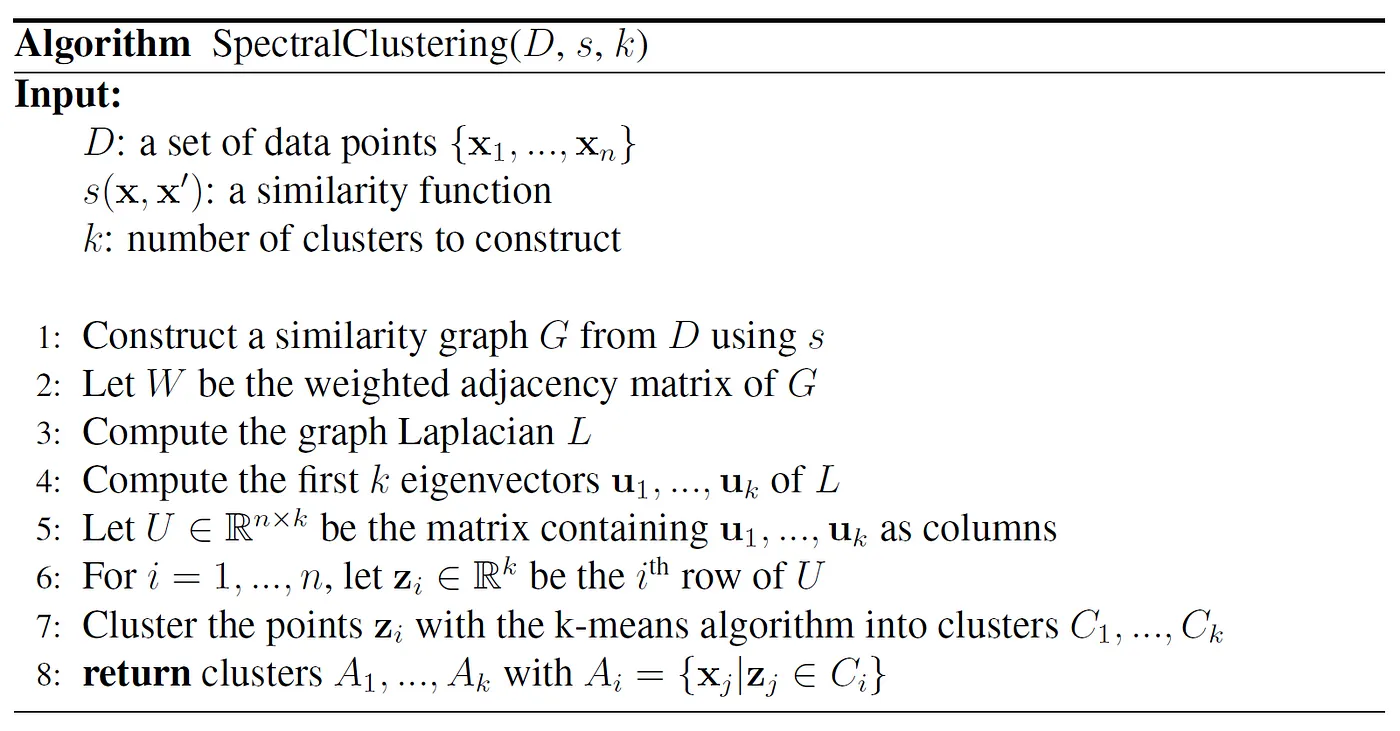

In [2]:
Image(filename="figures/spectral1.png", width=500)

#### Spectral Clustering in Scikit-Learn

Class `sklearn.cluster.SpectralClustering`:
 
The important hyperparameters of this class are:

- **n_clusters:** The number of clusters to construct (defaults to 8).
- **n_components:** The number of eigenvectors to use for the spectral embedding (defaults to n_clusters).
- **n_init:** The number of times to run k-means with different centroid seeds (defaults to 10).
- **affinity:** How to construct the similarity (affinity) matrix. Can be one of the following options:
    * 'rbf' (the default): construct the similarity matrix using the radial basis function kernel.
    * 'nearest_neighbors': construct the similarity matrix by computing a graph of nearest neighbors.
    * 'precomputed': interpret the input X as a precomputed affinity matrix.
    * one of the kernels supported by pairwise_kernels.
- **gamma:** The kernel coefficient for rbf, poly, sigmoid, and others (defaults to 1.0). In the case of using an rbf kernel, **γ = 1/2σ²**, i.e., the similarity function is: **s(x_i, x_j) = exp(-gamma * ||x_i-x_j||^2)**
- **n_neighbors:** The number of neighbors to use when constructing the similarity matrix using the nearest neighbors method (defaults to 10).

In [3]:
import numpy as np
from sklearn.datasets import make_moons
from sklearn.cluster import SpectralClustering
import seaborn as sns
import matplotlib.pyplot as plt

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

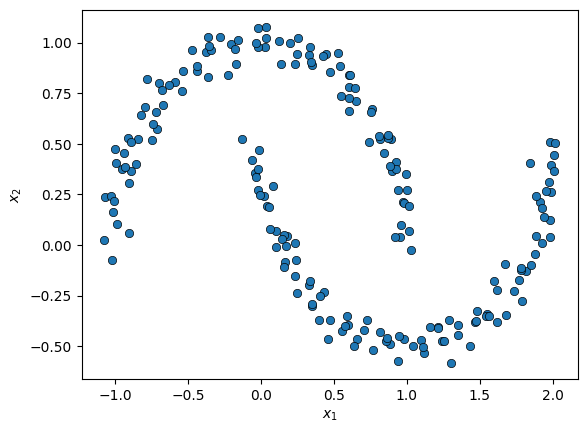

In [4]:
def plot_data(X):
    sns.scatterplot(x=X[:, 0], y=X[:, 1], edgecolor='k', legend=False)
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    
plot_data(X)

In [5]:
def plot_clusters(X, labels):
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=labels, palette='tab10', edgecolor='k', legend=False)
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')

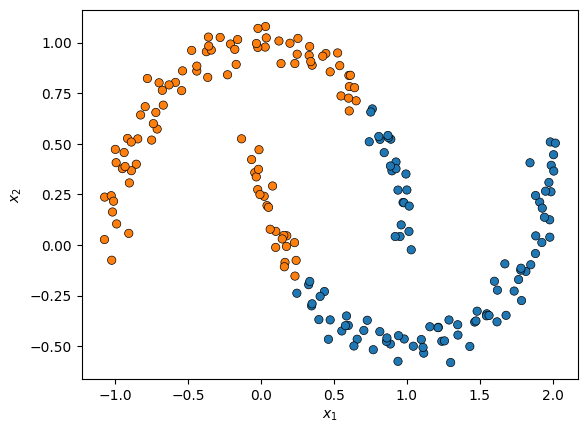

In [6]:
# affinity = 'rbf' and gamma = 1:
# neighborhood width: σ = 1 

sc = SpectralClustering(n_clusters=2, random_state=0)
labels = sc.fit_predict(X)

plot_clusters(X, labels)

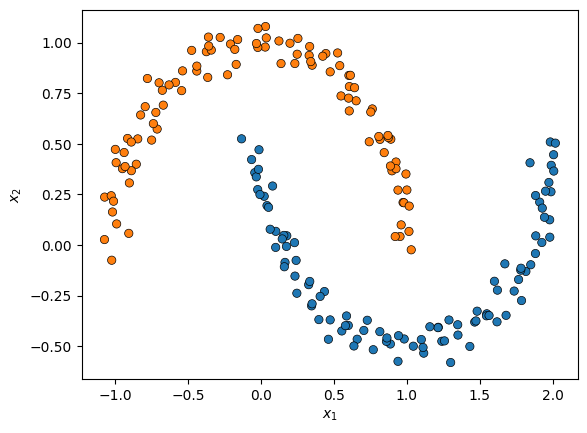

In [7]:
# affinity = 'rbf' and gamma = 20:
# neighborhood width: σ = 0.15

sc = SpectralClustering(n_clusters=2, gamma=20, random_state=0) 
labels = sc.fit_predict(X)

plot_clusters(X, labels)

#### Example:

Composite dataset: Points drawn from an elliptical cluster and two additional concentric circles with some random noise.

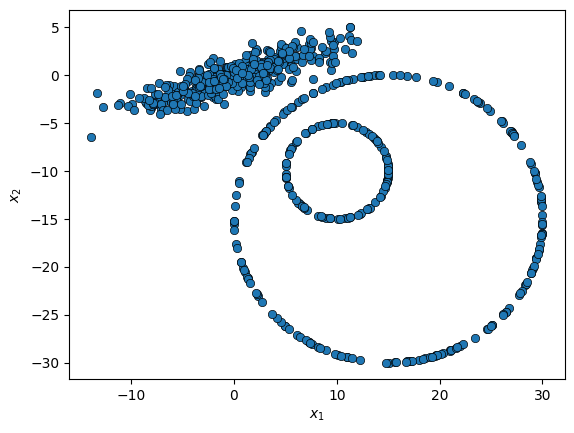

In [8]:
def compound_data(random_seed=0):
    random_state = np.random.RandomState(random_seed)
    
    # Generate the three clusters    
    # 1. Main elliptical cluster
    x1 = random_state.normal(0, 5, 400)
    y1 = x1 / 3 + random_state.normal(0, 1, 400)

    # 2. Small circle cluster
    angle2 = random_state.uniform(0, 2 * np.pi, 100)
    x2 = 5 * np.cos(angle2) + 10
    y2 = 5 * np.sin(angle2) - 10

    # 3. Larger circle cluster
    angle3 = random_state.uniform(0, 2 * np.pi, 200)
    x3 = 15 * np.cos(angle3) + 15
    y3 = 15 * np.sin(angle3) - 15

    return np.vstack((np.hstack((x1, x2, x3)), np.hstack((y1, y2, y3)))).T

X = compound_data()
plot_data(X)

#### Results of various clustering algorithms:

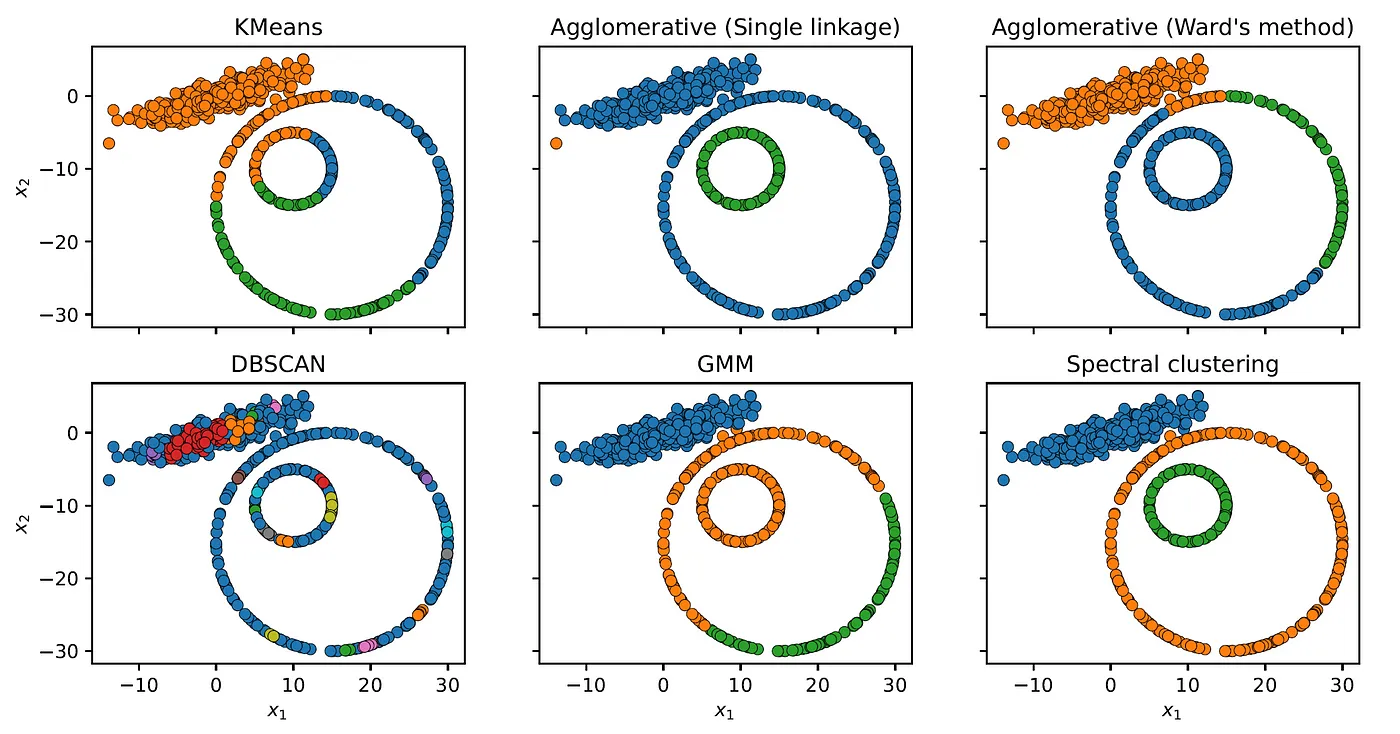

In [10]:
Image(filename="figures/spectral2.png", width=800)